In [21]:
# Necessary imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Import functions
import acquire
import prepare

# Plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

import warnings
warnings.filterwarnings("ignore")

### Store data

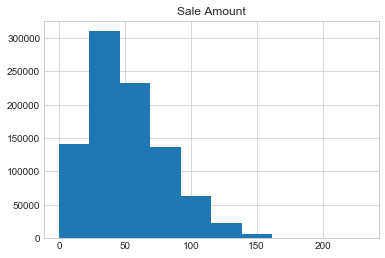

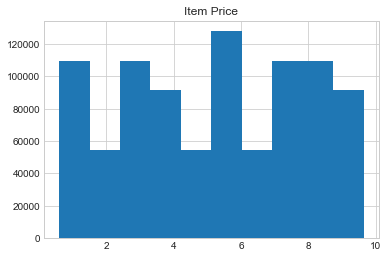

                           sale_amount  sale_id           store_address  \
sale_date                                                                 
2013-01-01 00:00:00+00:00         13.0        1  12125 Alamo Ranch Pkwy   
2013-01-01 00:00:00+00:00         26.0   211817  12018 Perrin Beitel Rd   
2013-01-01 00:00:00+00:00         27.0   832657  12018 Perrin Beitel Rd   
2013-01-01 00:00:00+00:00         54.0   213643     15000 San Pedro Ave   
2013-01-01 00:00:00+00:00         35.0   215469      735 SW Military Dr   

                            store_city  store_id store_state  store_zipcode  \
sale_date                                                                     
2013-01-01 00:00:00+00:00  San Antonio         1          TX          78253   
2013-01-01 00:00:00+00:00  San Antonio         7          TX          78217   
2013-01-01 00:00:00+00:00  San Antonio         7          TX          78217   
2013-01-01 00:00:00+00:00  San Antonio         8          TX          78232   


In [2]:
# Get the data from acquire.py and prep it via prepare.py

df = acquire.get_store_data()
df = prepare.prep_store_data(df)

In [3]:
# Check out the shape

df.shape

(913000, 16)

In [4]:
# A detailed look. I'm thinking of dropping some columns

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
sale_amount      913000 non-null float64
sale_id          913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_id         913000 non-null int64
store_state      913000 non-null object
store_zipcode    913000 non-null int64
item_brand       913000 non-null object
item_id          913000 non-null int64
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
month            913000 non-null int64
day_week         913000 non-null object
sales_total      913000 non-null float64
dtypes: float64(3), int64(7), object(6)
memory usage: 138.4+ MB


In [5]:
# Dropped columns. upc14 was redundant. All stores are in SA, TX. I have item_id, so I don't need the name or the brand

df = df.drop(['store_state', 'store_city', 'store_address', 'item_name', 'item_upc14', 'item_brand'], axis=1)

In [6]:
# Surveying the survivors

df.head(2)

,sale_amount,sale_id,store_id,store_zipcode,item_id,item_price,item_upc12,month,day_week,sales_total
sale_date,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,1,78253,1,0.84,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,7,78217,12,8.40,74676640211,1,Tuesday,218.40


In [8]:
# How many stores do I have?

df.store_id.nunique()

10

In [9]:
# Use 70/30 train test split %

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index

639100

In [10]:
# Create train and test dataframe

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

### Germany data

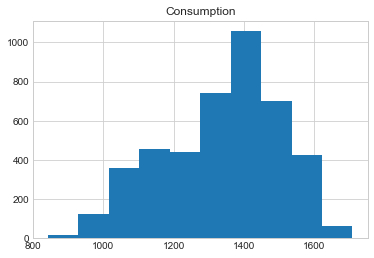

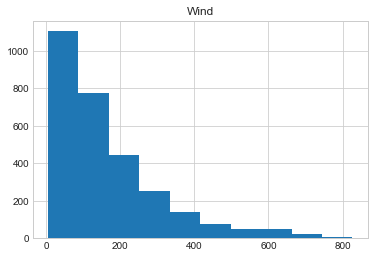

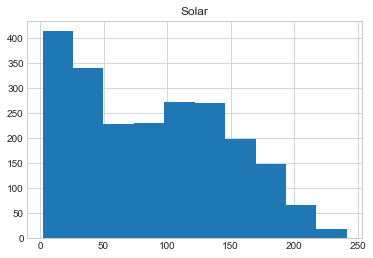

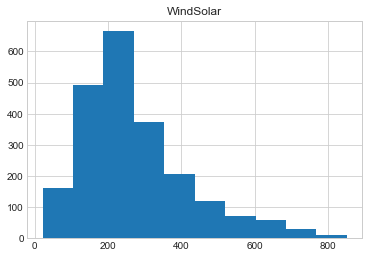

            Consumption  Wind  Solar  WindSolar  month  year
Date                                                        
2006-01-01     1069.184   0.0    0.0        0.0      1  2006
2006-01-02     1380.521   0.0    0.0        0.0      1  2006
2006-01-03     1442.533   0.0    0.0        0.0      1  2006
2006-01-04     1457.217   0.0    0.0        0.0      1  2006
2006-01-05     1477.131   0.0    0.0        0.0      1  2006


In [13]:
# Get the data from acquire.py and prep it via prepare.py

opsd_df = acquire.opsd_germany_daily()
df2 = prepare.prep_germany_data(opsd_df)

In [15]:
# Check out the shape

df2.shape

(4383, 6)

In [16]:
# A more-detailed look

df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
Consumption    4383 non-null float64
Wind           4383 non-null float64
Solar          4383 non-null float64
WindSolar      4383 non-null float64
month          4383 non-null int64
year           4383 non-null int64
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [17]:
# Use 70/30 train test split %

train2_size = .70
n = df2.shape[0]
test2_start_index = round(train2_size * n)
test2_start_index

3068

In [18]:
# Create train and test dataframe

train2 = df2[:test2_start_index] # everything up (not including) to the test_start_index
test2 = df2[test2_start_index:] # everything from the test_start_index to the end

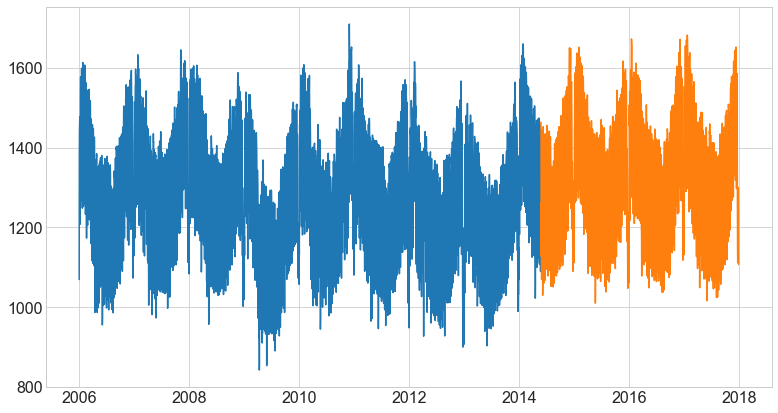

In [22]:
# Plot train2 and test2 with Consumption

plt.plot(train2.index, train2.Consumption)
plt.plot(test2.index, test2.Consumption)

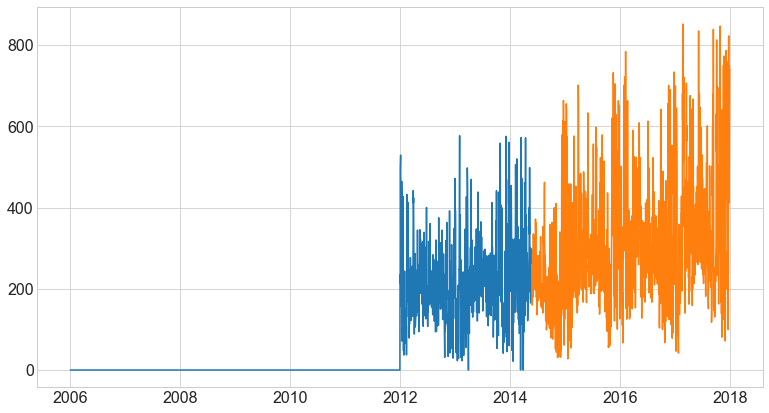

In [23]:
# Plot train2 and test2 with WindSolar

plt.plot(train2.index, train2.WindSolar)
plt.plot(test2.index, test2.WindSolar)

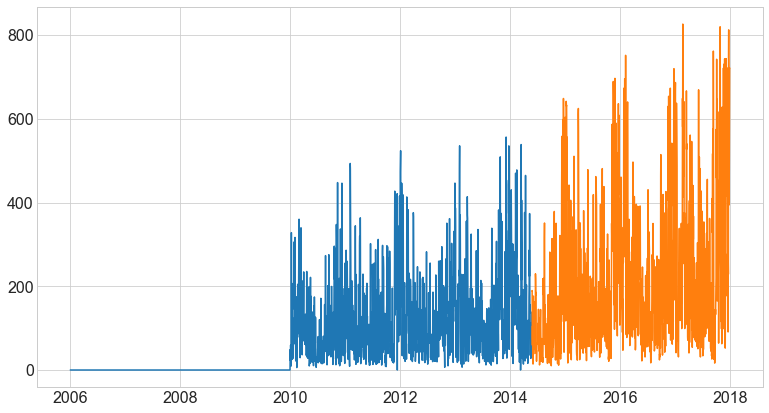

In [24]:
# Plot train2 and test2 with Wind

plt.plot(train2.index, train2.Wind)
plt.plot(test2.index, test2.Wind)